Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn import datasets

Part I - Importing the Dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail(5)

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Part II - Select setosa and versicolor

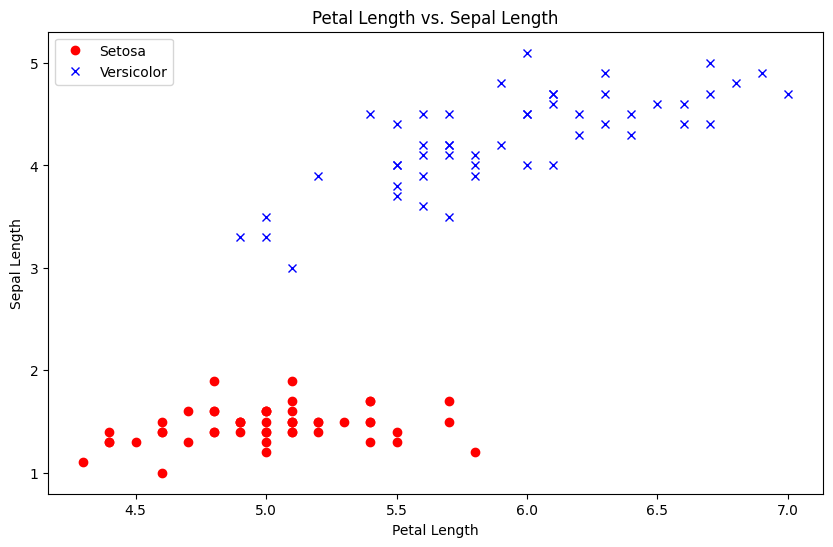

In [3]:
# Select setosa and versicolor sepal and petal length features
X = df.loc[(df[4]=='Iris-setosa') | (df[4]=='Iris-versicolor'), [0, 2]].values
y = df.loc[(df[4]=='Iris-setosa') | (df[4]=='Iris-versicolor'), 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Plot the petal length vs. sepal length features
fig = plt.figure(figsize=(10,6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro', label='Setosa')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bx', label='Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Petal Length vs. Sepal Length')
plt.legend()

Part III - Plot the Decision Boundary

In [4]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [5]:
# Train the perception
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n+1, 1))

    n_miss_list = []

    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)

            y_hat = step_func(np.dot(x_i.T, theta))

            if(np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr * ((y[idx] - y_hat) * x_i)
                n_miss += 1

        n_miss_list.append(n_miss)

    return theta, n_miss_list

In [6]:
def plot_decision_boundary(X, theta):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -theta[1] / theta[2]
    c = -theta[0] / theta[2]
    x2 = m * x1 + c

    fig = plt.figure(figsize=(10,6))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro', label='Setosa')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bx', label='Versicolor')
    plt.plot(x1, x2, 'y-')
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title('Perceptron Algorithm')
    plt.legend()

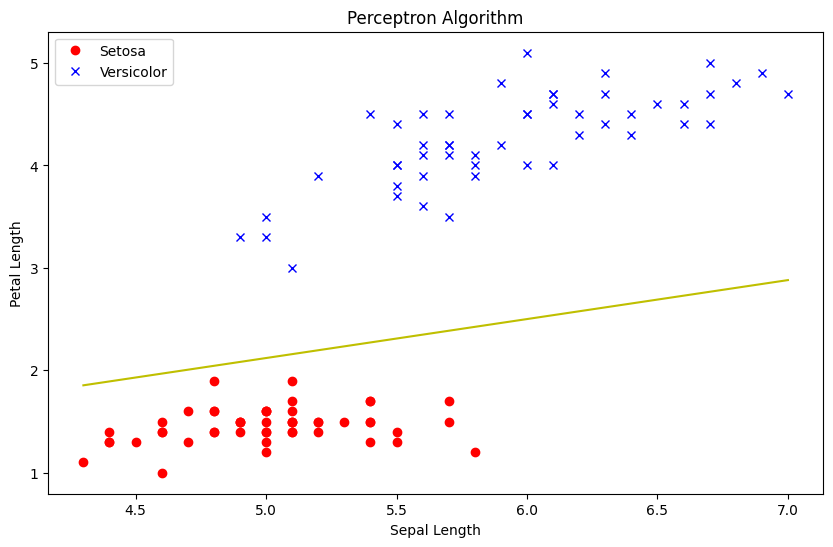

In [7]:
# Plot the Decision Boundary
theta, miss_list = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)